# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [4]:
list(df.columns)

['GenderSelect',
 'Country',
 'Age',
 'EmploymentStatus',
 'StudentStatus',
 'LearningDataScience',
 'CodeWriter',
 'CareerSwitcher',
 'CurrentJobTitleSelect',
 'TitleFit',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLMethodNextYearSelect',
 'LanguageRecommendationSelect',
 'PublicDatasetsSelect',
 'LearningPlatformSelect',
 'LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'Lear

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [5]:
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [6]:
df['AdjustedCompensation'].dtypes

dtype('float64')

In [7]:
df['AdjustedCompensation'].describe()

count    4.343000e+03
mean     6.636071e+06
std      4.293996e+08
min     -7.351631e+01
25%      2.036942e+04
50%      5.381217e+04
75%      9.566608e+04
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

In [8]:
df_bach = df[df['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation'].copy()
df_bach.dropna(inplace=True)

In [9]:
df_mast = df[df['FormalEducation'] == "Master's degree"]['AdjustedCompensation'].copy()
df_mast.dropna(inplace=True)

In [10]:
df_bach_200 = df_bach[df_bach < 200000]
df_mast_200 = df_mast[df_mast < 200000]

Median Salary for Bachelor 38399.4
Median Salary for Master Degree 53812.17
Sample Size for Bachelor 1107
Sample Size for Master Degree 1990


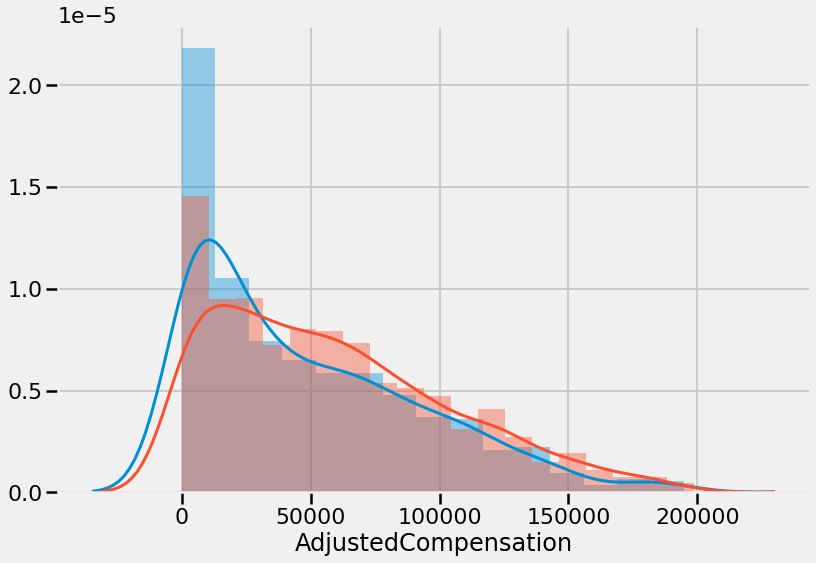

In [11]:
print(f'Median Salary for Bachelor {df_bach.median()}')
print(f'Median Salary for Master Degree {df_mast.median().round(2)}')

print(f'Sample Size for Bachelor {len(df_bach)}')
print(f'Sample Size for Master Degree {len(df_mast)}')

with plt.style.context('fivethirtyeight'):
    sns.set_context('poster')
    plt.figure(figsize = (12, 8))
    sns.distplot(df_bach_200, label = 'bach')
    sns.distplot(df_mast_200, label = 'mast')

In [12]:
# huge outliers

- Null Hypothesis: Salary for Bach = Salary for Mast
- Alternative Hypothsis: Salary for Bach != Slary for Mast

In [13]:
ttest_ind(df_bach_200, df_mast_200, equal_var = False)
# in this case, we will reject null hypothesis (pvalue < 0.05)

Ttest_indResult(statistic=-5.940176705418014, pvalue=3.286681514092391e-09)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [14]:
df_dr = df[df['FormalEducation'] == "Doctoral degree"]['AdjustedCompensation'].copy()
df_dr.dropna(inplace=True)

In [15]:
df_dr_200 = df_dr[df_dr < 200000]

Median Salary for Bachelor 38399.4
Median Salary for Doctor Degree 74131.92
Sample Size for Bachelor 1107
Sample Size for Doctor Degree 967


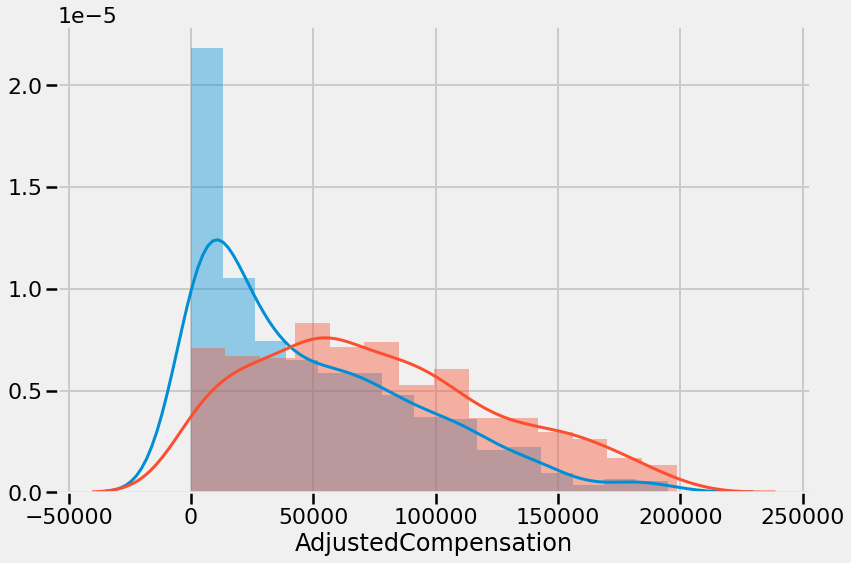

In [16]:
print(f'Median Salary for Bachelor {df_bach.median()}')
print(f'Median Salary for Doctor Degree {df_dr.median().round(2)}')

print(f'Sample Size for Bachelor {len(df_bach)}')
print(f'Sample Size for Doctor Degree {len(df_dr)}')

with plt.style.context('fivethirtyeight'):
    sns.set_context('poster')
    plt.figure(figsize = (12, 8))
    sns.distplot(df_bach_200, label = 'bach')
    sns.distplot(df_dr_200, label = 'dr')

* Null Hypothesis: Salary for Bach = Salary for Dr
* Alternative Hypothsis: Salary for Bach != Slary for Dr

In [17]:
ttest_ind(df_bach_200, df_dr_200, equal_var = False)

Ttest_indResult(statistic=-12.711357261693044, pvalue=1.540538210421189e-35)

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [18]:
df.FormalEducation.value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [19]:
formula = 'AdjustedCompensation ~ C(FormalEducation)'

In [20]:
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [21]:
lm = ols(formula, df[df['AdjustedCompensation']<200000]).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
#statistically significant

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  3.784221e+11     6.0  29.564778  7.016635e-35
Residual            8.897966e+12  4171.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!